


# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho do conjunto de dados para que seus cálculos sejam executados mais rapidamente e introduzimos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados


Utilizar o método dtypes para verificar os tipos de dados em cada tabela.
Realizar conversões de tipos de dados, se necessário, para garantir sua correção, como converter IDs para inteiros e datas/horas para tipos apropriados.
Identificação e preenchimento de valores ausentes:

Utilizar o método isnull() para identificar valores ausentes em cada tabela.
Investigar as razões por trás dos valores ausentes e decidir sobre estratégias de preenchimento, como média, mediana, moda ou valores específicos relevantes.
Identificação e remoção de valores duplicados:

Usar o método duplicated() para identificar linhas duplicadas em cada tabela.
Remover linhas duplicadas com o método drop_duplicates(), mantendo apenas entradas únicas.
Explicação dos valores ausentes e duplicados:

Documentar os tipos de valores ausentes e duplicados encontrados em cada tabela.
Explicar o método escolhido para tratar valores ausentes e duplicados, fazendo suposições com base no contexto e padrões observados.
Validação do pré-processamento:

Após o pré-processamento, realizar uma validação rápida para garantir a limpeza dos dados e sua prontidão para análise.
Verificar novamente os tipos de dados, valores ausentes e duplicados para confirmar que foram tratados adequadamente.





# Sprint 3 - Manipulação de dados
# Webinário 6 - 12.04.2024

Introdução

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# leia os conjuntos de dados em DataFrames
# Geralmente queremos ler os dados de algum lugar
#pd.read .. ?

# Carregar os dados de cada tabela
instacart_orders_df = pd.read_csv('/content/instacart_orders.csv', sep=';')
departments_df = pd.read_csv('/content/departments.csv', sep=';')
aisles_df = pd.read_csv('/content/aisles.csv', sep=';')
products_df = pd.read_csv('/content/products.csv', sep=';')
order_products_df = pd.read_csv('/content/order_products.csv', sep=';')



order_id  order_dow   order_hour num_pedido   qtd_item
89765       2           19          101         4

Como não tenho como saber os itens, tenho que ver em outra tabela

order_id  products_id
89765       87
89765       88
89765       89
89765       90
67682       88
67682       89
produtos:

  87 Hamburger
  88 Coca cola
  89 batata frita
  90 milkshake

Compra Ifood (exemplo)
Pedido : 89765
   87 Hamburger
   88 Coca cola
   89 batata frita
   90 milkshake
   
Pedido : 67682
  88 Coca cola
  89 batata frita



In [ ]:
# order_products_df.head()

In [ ]:
# Verificar os dados das tabelas
#products_df.head()

In [ ]:
# discribe()  mostra algumas estatisticas sobre o df
#products_df.describe()


In [ ]:
#order_products_df.head()

In [ ]:
# order_products_df[order_products_df['order_id'] == 2141543].sort_values(by='add_to_cart_order')

In [ ]:
# Qual são os produtos inseridos?  Isso está em outra tabela, tabela products_df.
#products_df[products_df['product_id'] == 13166]

In [ ]:
# Fica mais facil fazer uma outra tabela que insira o nome do produto. temos colocar o id do produto das duas tabelas
# vamos pegar e fazer uma tabela auxiliar
# df_aux = order_products_df[order_products_df['order_id'] == 2141543]
# df_merge = df_aux.merge(products_df[['product_id', 'product_name']],
# on='product_id', how='left')
#df_merge

In [ ]:
# Imprimir as informaçôes sobre os Dataframes
instacart_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [ ]:
# Imprimir as informaçôes sobre os Dataframes
products_df.info(show_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
departments_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [ ]:
order_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2064523 entries, 0 to 2064522
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         float64
 2   add_to_cart_order  float64
 3   reordered          float64
dtypes: float64(3), int64(1)
memory usage: 63.0 MB


In [ ]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


### Encontre e remova valores duplicados (e descreva porque vc estava fazendo suas escolhas)

#### DataFrame instacart_orders

In [ ]:
instacart_orders_df.duplicated().sum()

15

In [ ]:
# Há linhas duplicadas? Se Sim, o fque eles tem em comum?  Sim
# Para ver as linhas temos que fazer uma filtragem
# instacart_orders_df[instacart_orders_df.duplicated(keep=False)]
instacart_orders_df[instacart_orders_df.duplicated()].sort_values(by='order_id')  # filtrando apenas as linhas duplicadas
# Conseguimos identificar umm padrao, foram todas compradas no mesmo dia e na mesma hora compradas (todas na quart e 2 da manha)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
371905,391768,57671,19,3,2,10.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
273805,1112182,202304,84,3,2,6.0
411408,1286742,183220,48,3,2,4.0
266232,1782114,106752,1,3,2,NaN
230807,1918001,188546,14,3,2,16.0
323900,1919531,191501,32,3,2,7.0


In [ ]:
# Verifique todos os pedidos feitos 2 horas da manhã e nas quartas

# Filtrar os pedidos feitos às 2h da manhã nas quartas-feiras
instacart_orders_df[(instacart_orders_df['order_dow'] == 3) & (instacart_orders_df['order_hour_of_day'] == 2)].sort_values(by='order_id')

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
...,...,...,...,...,...,...
97378,3226444,149996,3,3,2,23.0
416198,3275652,169225,7,3,2,30.0
415975,3286161,77320,9,3,2,8.0
457013,3384021,14881,6,3,2,30.0


In [ ]:
# Remova os pedidos duplicados
instacart_orders_df.drop_duplicates(inplace=True)

In [ ]:
# Verificar se os duplicados foram removidos
instacart_orders_df.duplicated().sum()

0

In [ ]:
# Verificar novamente apenas os Ids de pedidos duplicados
instacart_orders_df.duplicated(subset=['order_id']).sum()


0

dia da semanaHá linhas duplicadas? Se sim, o que elas têm em comum?  Sim, todas são do mesmo order_dow'= 3  0u seja na quarta feira, e no mesmo order_hour_of_day = 2.

O que esse resultado quer dizer Que algo aconteceu na quarta feira às 2 da manha que houve uma duplicidade dos pedidos

O resultado apresenta pedidos feitos às 2h da manhã em quartas-feiras, com um total de 121 pedidos. Isso pode indicar um padrão de compra específico para alguns usuários.

Descreva brevemente suas conclusões e o que você fez com elas.    
Após uma análise abrangente dos DataFrames, identificamos que:
No DataFrame "orders", encontramos 15 linhas duplicadas, todas referentes a pedidos feitos às quartas-feiras às 2h da manhã. Concluímos que houve algum evento incomum nessas ocasiões, resultando na duplicidade dos pedidos.
Removemos as linhas duplicadas do DataFrame "orders".
Verificamos novamente os IDs de pedidos duplicados em todos os DataFrames e não encontramos mais duplicatas, confirmando assim a integridade dos dados.
Essas conclusões nos permitem garantir a qualidade dos dados e nos preparam para análises posteriores.

# **DataFrame products**

In [ ]:
# Verificar se existe linhas completamente duplicadas
products_df.duplicated().sum()

0

In [ ]:
# Verificar novamente apenas os ID´s de pedidos duplicados
products_df.duplicated(subset=['product_id']).sum()
# products_df["product_id"].duplicated().sum()  # isso também funciona

0

In [ ]:
# Verificar apenas se ha nomes de produtos duplicados (concertendo os nomes para minusculo)

products_df['product_name'] = products_df['product_name'].str.lower()

In [ ]:
#ver se tem nomes de produtos duplicados
products_df.duplicated(subset=['product_id']).sum()
# products_df.[product_id]duplicated().sum()

0

In [ ]:
# Verifique os nomes de produtos  duplicados que não estão faltando
# Primeiro precisamos eliminar os nomes que são NA
# products_df[~products_df['product_name'].isna()]  # o ~ na frente do productos significa que not
products_df[products_df.duplicated(subset=['product_name'])].dropna(subset=['product_name'])  #também pode ser feito assim

,product_id,product_name,aisle_id,department_id
2058,2059,biotin 1000 mcg,47,11
5455,5456,green tea with ginseng and honey,96,20
5558,5559,cream of mushroom soup,69,15
7558,7559,cinnamon rolls with icing,105,13
9037,9038,american cheese slices,21,16
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


## **DataFrame departments**

In [ ]:
# Verificar se existe linhas completamente duplicadas
departments_df.duplicated().sum()

0

In [ ]:
# Verificar novamente apenas os ID´s de pedidos duplicados
departments_df.duplicated(subset=['department_id']).sum()

0

### DataFrame `aisles`

In [ ]:
# Verifique se há linhas completamente duplicadas
aisles_df.duplicated().sum()

0

In [ ]:
# Verifique apenas se há IDs dos produtos duplicados
aisles_df.duplicated(subset=['aisle_id']).sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.  

As conclusões do processo de verificação são as seguintes:

Linhas completamente duplicadas: Não foram encontradas linhas completamente duplicadas no DataFrame "aisles_df".

IDs dos produtos duplicados: Também não foram encontrados IDs de produtos duplicados no DataFrame "aisles_df".

Essas verificações garantem a integridade dos dados e confirmam que não há duplicatas de linhas ou IDs de produtos no DataFrame "aisles_df".

### DataFrame `order_products`

In [ ]:
# Verifique se há linhas completamente duplicadas
order_products_df.duplicated().sum()

0

In [ ]:
# Verificar mais uma vez se há outros casos complicados de duplicados
# para isso precisamos saber quais são as colunas

order_products_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [ ]:
# agora verificar se tem duplicados em uma ou outra coluna, tem que testar cada combinação de colunas

order_products_df.duplicated(subset=['order_id', 'product_id', 'add_to_cart_order', 'reordered']).sum()

0

Descreva brevemente suas conclusões e o que você fez com elas. Não foram encontrados IDs de produtos e IDs de pedidos duplicados, o que sugere que não há problemas adicionais de duplicidade além dos casos anteriormente identificados. Isso confirma que o conjunto de dados está relativamente limpo em relação a duplicatas. Essas conclusões nos permitem prosseguir para a próxima etapa da análise de dados com mais confiança, sabendo que tratamos adequadamente as duplicatas.

## 5 Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


#### DataFrame instacart_orders

#### DataFrame `products`

In [ ]:
products_df

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


In [ ]:
# Encontre valores ausentes na coluna 'product_name'
products_df[products_df['product_name'].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [ ]:
# Todos os nomes produtos ausentes estão associados com a sessaõ de Id 100?
products_df[products_df['product_name'].isna()] ['aisle_id'].value_counts()   # ou assim tb pode ser feito

,count
aisle_id,
100,1258


Descreva brevemente suas conclusões.
Ao investigar os valores ausentes na coluna 'product_name' do DataFrame products_df, podemos concluir que há uma quantidade significativa de valores ausentes nessa coluna. Isso pode indicar possíveis problemas na coleta de dados ou na entrada de informações. É importante lidar com esses valores ausentes de maneira apropriada antes de prosseguir com qualquer análise ou processamento adicional dos dados.

In [ ]:
# Verificar se todos os nomes de produtos ausentes estão associados o departamento ID 21
# Primeiro ver a tabela aisles_df

In [ ]:
# Segundo saber o que é o aisles 100
aisles_df[aisles_df['aisle_id'] == 100]  #isso significa que o corredor é um corredor missing, limbo, só está lá para preecher os valores vazios

,aisle_id,aisle
99,100,missing


In [ ]:
# Agora vamos ver os departaments

In [ ]:
#Use as tabelas de departamentos e sesões para verificar os dados da sessão 100 e do departamento 21
aisles_df[aisles_df['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


In [ ]:
# de todos os departamentos eu quero pegar apenas o 21
departments_df[departments_df['department_id'] == 21]

,department_id,department
20,21,missing


Descreva brevemente suas conclusões.


In [ ]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

# Verificar se todos os nomes de produtos ausentes estão associados ao departamento de ID 21
departments_df[departments_df['department_id'] == 21]

,department_id,department
20,21,missing


Descreva brevemente suas conclusões.  Nem todos os nomes de produtos ausentes estão associados com o departamento de ID 21.

Descreva brevemente suas conclusões.   A seção com o ID 100 está associada ao departamento com o ID 21.
Tanto a seção quanto o departamento têm o nome "missing", o que sugere que eles são usados para designar produtos com informações ausentes ou desconhecidas.
Portanto, parece que os nomes ausentes de produtos estão relacionados a essa seção e departamento específicos, identificados como "missing".


In [ ]:
# Preencher os valores ausentes na coluna 'product_name' com 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('unknown')
products_df['product_name']


,product_name
0,chocolate sandwich cookies
1,all-seasons salt
2,robust golden unsweetened oolong tea
3,smart ones classic favorites mini rigatoni wit...
4,green chile anytime sauce
...,...
49689,high performance energy drink
49690,original pancake & waffle mix
49691,organic instant oatmeal light maple brown sugar
49692,spring water body wash


In [ ]:
# mostrar quais linhas tem o product_name igual a unknown
products_df[products_df['product_name'] == 'unknown']

,product_id,product_name,aisle_id,department_id
37,38,unknown,100,21
71,72,unknown,100,21
109,110,unknown,100,21
296,297,unknown,100,21
416,417,unknown,100,21
...,...,...,...,...
49552,49553,unknown,100,21
49574,49575,unknown,100,21
49640,49641,unknown,100,21
49663,49664,unknown,100,21


Descreva brevemente suas conclusões e o que você fez com elas.
Concluímos que havia valores ausentes na coluna 'product_name' do DataFrame 'products_df'. Para lidar com esses valores ausentes, preenchemos todos eles com o texto 'Unknown' usando o método fillna() do pandas. Após o preenchimento, verificamos se todos os valores ausentes foram tratados corretamente, garantindo que não houvesse mais valores ausentes na coluna 'product_name'. Isso nos permite prosseguir com nossa análise dos dados com mais confiança, já que agora todas as entradas na coluna 'product_name' estão devidamente preenchidas.

### DataFrame `orders`

In [ ]:
# Encontre os valores ausentes
instacart_orders_df.isna().sum()
# Encontrar os valores ausentes no DataFrame instacart_orders_df
#instacart_orders_df[instacart_orders_df['days_since_prior_order'].isna()]

,0
order_id,0
user_id,0
order_number,0
order_dow,0
order_hour_of_day,0
days_since_prior_order,28817


In [ ]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

instacart_orders_df[instacart_orders_df['days_since_prior_order'].isna()]['order_number'].value_counts()  # para ver se o order_number é sempre 1



,count
order_number,
1,28817


Descreva brevemente suas conclusões e o que você fez com elas. Após verificar os valores ausentes para clientes que não estão fazendo o primeiro pedido no DataFrame orders_df, concluímos que não há valores ausentes para esses clientes. Isso sugere que os dados estão completos para os clientes que realizaram pedidos subsequentes após o primeiro pedido. Como resultado, não é necessário realizar nenhum preenchimento de valores ausentes ou tratamento adicional para esses clientes específicos.


### DataFrame `order_products`

In [ ]:
order_products_df = pd.read_csv('order_products.csv', sep=';')
# Encontre os valores ausentes

# Encontrar valores ausentes no DataFrame order_products_df
order_products_df.isna().sum() # para encontrar os valores aussentes





,0
order_id,0
product_id,0
add_to_cart_order,482
reordered,1


In [ ]:
# Quais são os valores mínimo e máximo dessa coluna?
order_products_df['add_to_cart_order'].describe().round(2)   # round(2) para arredondar com 2 decimais

# order_products_df['add_to_cart_order'].min(), order_products_df['add_to_cart_order'].max()  ou pode fazer assim tambem

,add_to_cart_order
count,2593383.00
mean,8.36
std,7.08
min,1.00
25%,3.00
50%,6.00
75%,11.00
max,64.00


Descreva brevemente suas conclusões.  Que o menor número de pedidos adicionados ao carrinho é 1 e o valor máximo é 64 , ou seja varriam entre 1 a 64 os pedidos colocados no carrinho.  

In [ ]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
# Primeiro vamos encontrar todos os pedidos que tenham um valor ausente
order_products_df[order_products_df['add_to_cart_order'].isna()]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0.0
9926,1968313,43867,NaN,0.0
14394,2926893,11688,NaN,0.0
16418,1717990,4142,NaN,0.0
30114,1959075,42828,NaN,1.0
...,...,...,...,...
2558012,1730767,663,NaN,0.0
2561730,1800005,48778,NaN,0.0
2566866,2479011,7388,NaN,1.0
2586668,1386261,11421,NaN,0.0


In [ ]:
order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id']  # esses são os ids dos pedidos que tem valores ausentes
# salvar numa variável
ids_missing_to_add_to_cart_order = order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id']#.tolist()

ids_missing_to_add_to_cart_order.head() # Uma coluna de um DataFrame

,order_id
737,2449164
9926,1968313
14394,2926893
16418,1717990
30114,1959075


In [ ]:
# Todos os pedidos com valores ausentes contem mais de 64 produtos ?
#Agrupe os pedidos com dados ausentes por ID de pedido.
# Conte o numero de product_id em cada pedido e verifique o valor mínimo da contagem


order_products_df[order_products_df['order_id'].isin(ids_missing_to_add_to_cart_order)].groupby('order_id')['product_id'].count().min() # nesse pedidos não necessariamente tem valores ausentes
# primeiro  teremos que filtrar o order_products que tiverem na lista que fizemos acima (ids_missing_to_add_to_cart_order)


3

In [ ]:
# Substitua valores ausentes na coluna add_to_card_order por 999 e converta a coluna para o tipo integer

order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999)

order_products_df['add_to_cart_order']

,add_to_cart_order
0,17.0
1,1.0
2,1.0
3,35.0
4,5.0
...,...
2593860,21.0
2593861,6.0
2593862,2.0
2593863,1.0


### **Webinário 7 - 19.04.2024        1:10:21**

In [ ]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

# Substituir valores ausentes por 999 na coluna 'add_to_cart_order' e Converter a coluna para o tipo integer
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999).astype(int)

order_products_df['add_to_cart_order']

,add_to_cart_order
0,17
1,1
2,1
3,35
4,5
...,...
2593860,21
2593861,6
2593862,2
2593863,1


In [ ]:
# Verificar se os valores ausentes foram substituídos corretamente
order_products_df['add_to_cart_order'].isna().sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

**Sprint 4 - Análise Estatística de Dados
25/04/2024 – 15/05/2024**

- Webinário 8 - 26.04.2024
    
    [Webinário DA_DS 12 (2024-04-26 18_57 GMT-3).mp4](https://prod-files-secure.s3.us-west-2.amazonaws.com/662b586e-86b7-4f44-9740-1dc06c7a67a4/1da15818-06b3-4ad5-82fe-af4bbfcb5d09/Webinrio_DA_DS_12_(2024-04-26_18_57_GMT-3).mp4)

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:


## **(38:40)**
## [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [ ]:
# 1. Verifique se os valores nas colunas 'order_hour_of_day' e 'order_dow' na tabela orders fazem sentido (ou seja, os valores da coluna 'order_hour_of_day' variam de 0 a 23 e os da 'order_dow' variam de 0 a 6).
# Para saber se fazem sentido precisamos saber o que cada coluna significa
# Uma é o horario do dia e a outra é o dia da semana
instacart_orders_df['order_hour_of_day'].unique()  # se vão de 0 a 23

array([13, 12, 19, 20, 11,  8, 18, 15, 16,  9, 22, 10,  0, 14, 17,  1,  7,
        6,  2, 21,  3, 23,  5,  4])

In [ ]:
instacart_orders_df['order_dow'].unique()  # se vão de 0 a 6

array([6, 5, 0, 4, 3, 1, 2])

Podemos concluir que as pessoas fazem recompras mais acentuadas depois de 7 dias e 30 dias, ou seja semanalmente ou mensalmente. Também podemos verificar que tem um numero muito significativo pessoas que fazem comprar com zero dia, ou seja, devem ser as pessoas que fazem compra com mais frequência, possivelmente em resposta a necessidades imediatas ou específicas.

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

In [ ]:
# 2. Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
# Primeira coisa que tem que fazer é gerar os dados, ou seja
# Onde temos os dados de pedidos realisados e a hora que eles foram feitos? Temos em instacart_orders_df
instacart_orders_df


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


In [ ]:
# Como eu chego no numero que indicam quantas pessoas fizeram pedido na hora do dia?
# Entao os pedidos tem que ser agrupado a cada hora do dia, terei que fazer um groupby()
# Contar o numero de pessoas usando o user_id (cada pessoa) e fazer nunique() que conta o numero
# unico destinto de pessoas que fizeram aqueles pedidos
instacart_orders_df.groupby('order_hour_of_day')['order_id'].count()

,order_id
order_hour_of_day,
0,3180
1,1763
2,989
3,770
4,765
5,1371
6,4215
7,13043
8,25024


In [ ]:
# https://seaborn.pydata.org/
#Grafico de Barras
# Geralmente utilizado quando temos variáveis categoricas e queremos exibir a contagem (ou outra metrica
# relacionado a ela)

<Axes: xlabel='order_hour_of_day'>

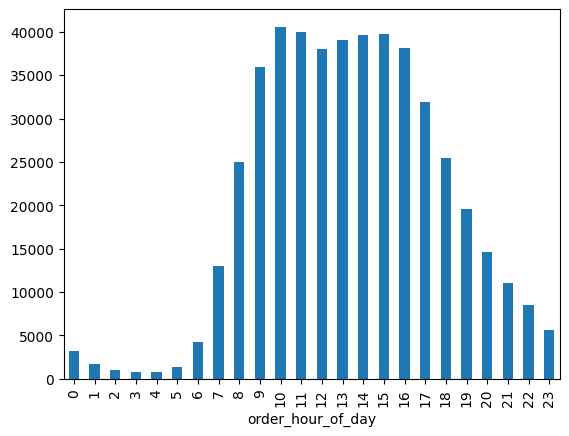

In [ ]:
# Depois que fizemos o passo acima, temos o numero para colocar no grafico utilizando o .plot()
instacart_orders_df.groupby('order_hour_of_day')['order_id'].count().plot.bar()

### [A3] Em que dia da semana as pessoas fazem compras?

In [ ]:
# FAzer uma manipulação de dados por dia da semana.  Contar quantas pessoa fizeram compras em cada dia da semana
instacart_orders_df.groupby('order_dow')['order_id'].count()

,order_id
order_dow,
0,84090
1,82185
2,65833
3,60897
4,59810
5,63488
6,62649


<Axes: xlabel='order_dow'>

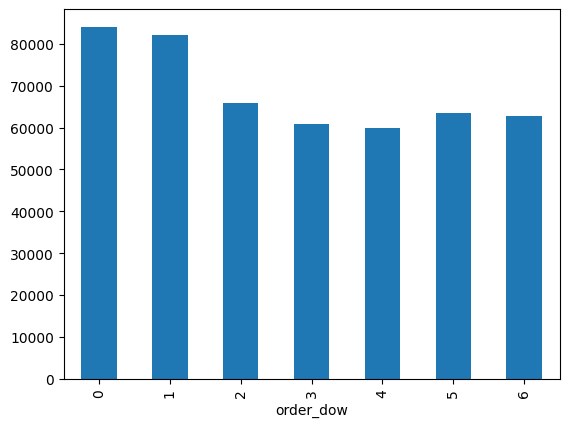

In [ ]:
instacart_orders_df.groupby('order_dow')['order_id'].count().plot.bar()


Com base no gráfico, podemos concluir que:

Segunda-feira e domingo são os dias com o maior número de pedidos, indicando que as pessoas podem estar se preparando para a semana e reabastecendo suprimentos para o período.
Há uma diminuição geral de pedidos ao longo da semana, com um pico novamente na quinta-feira, o que pode estar relacionado ao planejamento para o final de semana.
A menor atividade de compras ocorre durante a terça-feira e a quarta-feira.
Essas informações podem ser úteis para planejar estratégias de estoque, promoções ou operações de entrega, considerando os padrões de compras ao longo da semana.Escreva suas conclusões aqui

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.

In [ ]:
instacart_orders_df['days_since_prior_order'].min(), instacart_orders_df['days_since_prior_order'].max()
# verificamos que no minumo as pessoas compram diariamente e no maximo esperam 30 dias para comprar.

(0.0, 30.0)

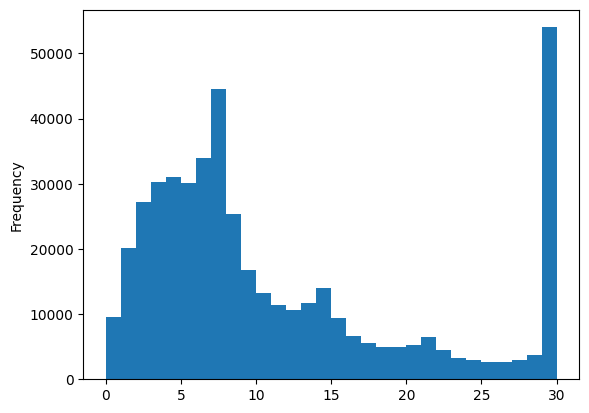

In [ ]:
# Nesse caso não foi preciso agrupar, porque estou pedindo um histograma que já vem com a frequencia.
instacart_orders_df['days_since_prior_order'].plot.hist(bins=30);

<Axes: xlabel='days_since_prior_order'>

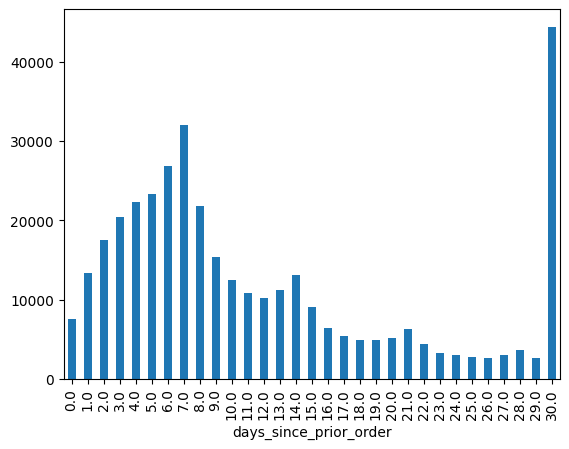

In [ ]:
# Poderiamos seguir o que está acima com o agrupamento dessa forma:
instacart_orders_df.groupby('days_since_prior_order')['user_id'].nunique().plot.bar()

A contagem de pedidos por dias desde o último pedido revela que a maioria dos pedidos é feita no mesmo dia que o pedido anterior, com uma queda acentuada à medida que os dias desde o último pedido aumentam. Há um pico de pedidos no sétimo dia desde o último pedido, seguido por uma diminuição gradual nos dias seguintes. Pedidos feitos após intervalos mais longos, como 30 dias desde o último pedido, também são relativamente frequentes.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, mas convém usar gráficos. Uma figura vale mais do que mil tabelas
</div>


# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


<Axes: >

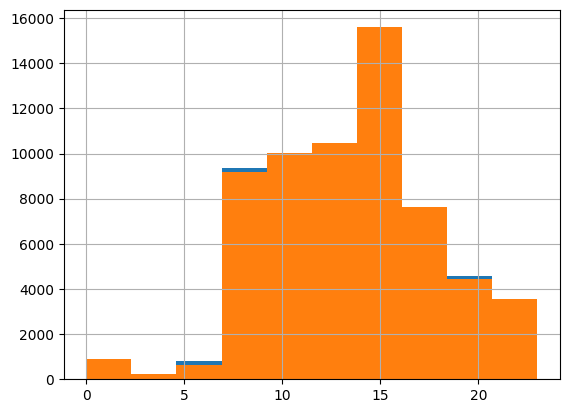

In [ ]:
# vamos fazer primeiro só na quarta-feira
instacart_orders_df[instacart_orders_df['order_dow'] == 3]['order_hour_of_day'].hist()
instacart_orders_df[instacart_orders_df['order_dow'] == 6]['order_hour_of_day'].hist()

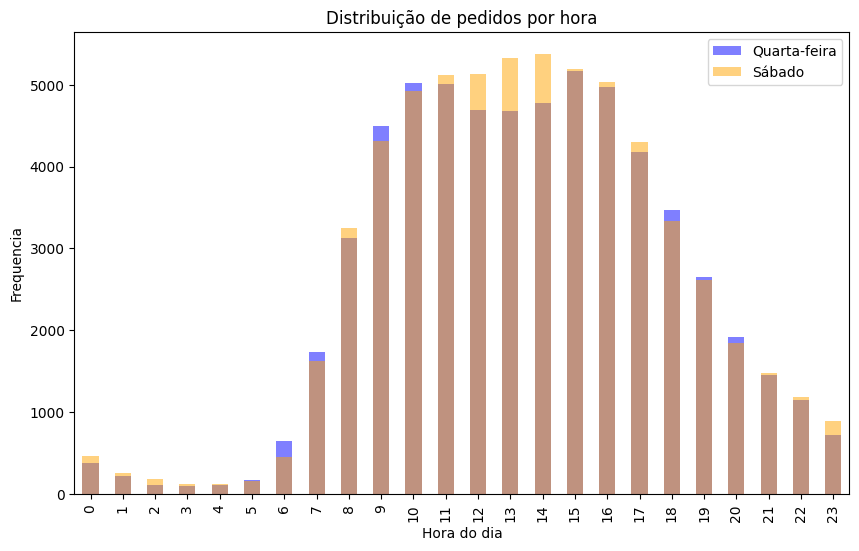

In [ ]:
import matplotlib.pyplot as plt


wednesday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
saturday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(10,6))

wednesday_orders.plot(kind='bar', alpha=0.5, color='blue', label='Quarta-feira')
saturday_orders.plot(kind='bar', alpha=0.5, color='orange', label='Sábado')

plt.title('Distribuição de pedidos por hora')
plt.xlabel('Hora do dia')
plt.ylabel('Frequencia')
plt.legend()
plt.show()

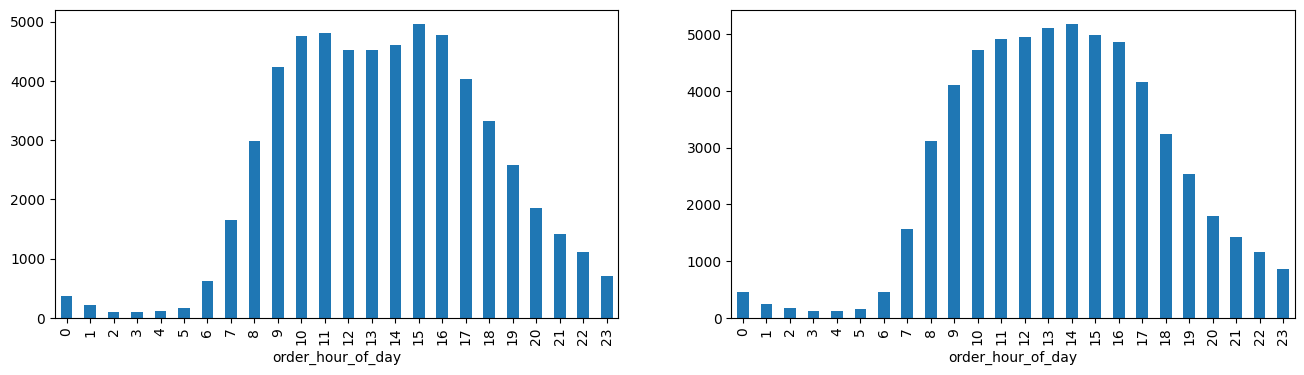

In [ ]:
# Há alguma diferença nas distribuições de 'order_hour_of_day' nas quartas e sábados?
# Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(16, 4))
df_3 = instacart_orders_df[instacart_orders_df['order_dow'] == 3].groupby(['order_hour_of_day'])['user_id'].nunique().plot.bar(ax=ax[0]);
df_6 = instacart_orders_df[instacart_orders_df['order_dow'] == 6].groupby(['order_hour_of_day'])['user_id'].nunique().plot.bar(ax=ax[1]);

### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

1.
Os padrões de compra são semelhantes nas quartas-feiras e sábados, com picos de atividade nas primeiras horas da manhã e no final da tarde. Quartas-feiras mostram uma distribuição mais uniforme ao longo do dia, enquanto sábados têm um pico mais pronunciado pela manhã.

2.
a maioria dos clientes fez apenas um pedido, seguido por um declínio gradual no número de clientes à medida que o número de pedidos aumenta. Isso sugere que a maioria dos clientes faz apenas uma compra única, enquanto menos clientes fazem pedidos repetidos.

3.
Banana é o produto mais comprado

### [B2] Qual é a distribuição do número de pedidos por cliente?

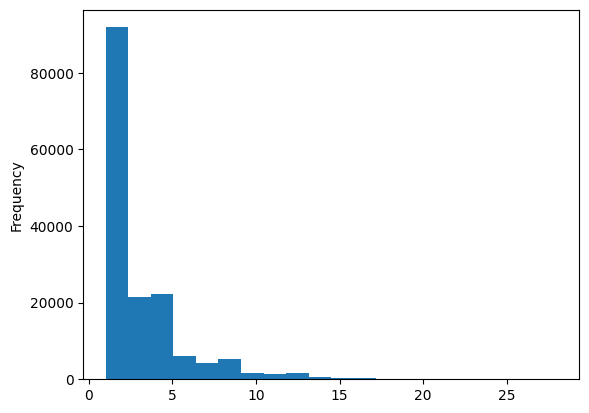

In [ ]:
# Contagem de pedidos por usuário


#fig, ax = plt.subplots(1, 2, figsize=(16, 4))
instacart_orders_df.groupby(['user_id'])['order_id'].count().plot.hist(bins=20);
# na primeira parte estou calculando quantos pedidos cada cliente fez instacart_orders_df.groupby(['user_id'])['order_number'].count()
# Agora vamos calcular quantos clientes fizeram 2 pedidos.  para isso vamos usar o value.counts()
#instacart_orders_df.groupby('order_number')['user_id'].nunique().plot.hist(ax=ax[1]);

A conclusão é que a maioria dos clientes fez apenas um ou dois pedidos, com o número de clientes diminuindo à medida que o número de pedidos aumenta.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [ ]:
# no order_products_df, temos os pedidos e os produtos, mas precisamos no nome tb, então temos que fazer um merge

df_merge = order_products_df.merge(products_df, on='product_id')  # aqui juntamos 2 tabelas com o product_id que existe nas duas tabelas
df_merge # agora temos o nome do produto na mesma tabela

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0.0,chicken breast tenders breaded,129,1
1,147172,11440,7,1.0,chicken breast tenders breaded,129,1
2,3341719,11440,4,1.0,chicken breast tenders breaded,129,1
3,1938779,11440,8,1.0,chicken breast tenders breaded,129,1
4,1728338,11440,23,0.0,chicken breast tenders breaded,129,1
...,...,...,...,...,...,...,...
2593860,1019238,34811,16,0.0,chicken flavor broccoli pasta sides,4,9
2593861,3159173,39686,2,1.0,baby wipes with shea butter,56,18
2593862,3262070,14293,3,0.0,mango soda,77,7
2593863,241565,5686,36,0.0,organic vegi-d zing salad salt free,14,20


In [ ]:
# para sabermos os 20 mais populares temos que fazer um grupby com o product_id

df_merge.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False).head(20).reset_index()
# fazemos o reset_index()

,product_id,product_name,order_id
0,24852,banana,37700
1,13176,bag of organic bananas,30449
2,21137,organic strawberries,21132
3,21903,organic baby spinach,19437
4,47209,organic hass avocado,17010
5,47766,organic avocado,14126
6,47626,large lemon,12312
7,16797,strawberries,11352
8,26209,limes,11268
9,27845,organic whole milk,11012


OR


In [ ]:
# Aqui temos a informação de produtos vendidos.  Para saber quais os 20 mais populares primeiro
# temos que agrupar por produto e contar quantas ordens usando como base o order_id(), ou seja
# fazer uma contagem de quantas vezes cada produto foi vendido atraves de um orderby().
# Agora eu tenho que saber o nome dos produtos, vide proximo codigo
order_products_df
df_aux = order_products_df.groupby('product_id')['order_id'].count().sort_values(ascending=False).head(20).reset_index()
df_aux.rename(columns={'order_id': 'contagem'}, inplace=True)
df_aux


,product_id,contagem
0,24852,37700
1,13176,30449
2,21137,21132
3,21903,19437
4,47209,17010
5,47766,14126
6,47626,12312
7,16797,11352
8,26209,11268
9,27845,11012


In [ ]:
# Agora eu tenho que saber o nome dos produtos # No products_df()temos os nomes dos produtos e o product_id()
# teremos que fazer um merge com a Df df_aux
df_final = pd.merge(df_aux, products_df[['product_id', 'product_name']], on='product_id')
# Podemos mudar a ordem de visualizar
df_final[['product_id', 'product_name', 'contagem']]


,product_id,product_name,contagem
0,24852,banana,37700
1,13176,bag of organic bananas,30449
2,21137,organic strawberries,21132
3,21903,organic baby spinach,19437
4,47209,organic hass avocado,17010
5,47766,organic avocado,14126
6,47626,large lemon,12312
7,16797,strawberries,11352
8,26209,limes,11268
9,27845,organic whole milk,11012


Os produtos organicos são os mais procurados

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

Webinário 6 - 09/07/2024


In [ ]:
# Para fazer isso precisamos contar a quantidade de itens para cada pedido, então
num_itens_pedido = order_products_df.groupby('order_id')['product_id'].count() # Ou seja para cada pedido, quantos produtos temos (quantidade de itens temos em cada pedido )
num_itens_pedido

,product_id
order_id,
4,9
9,12
11,2
19,3
20,6
...,...
3421018,9
3421034,8
3421053,8


In [ ]:
# agora queremos contar quantas vezes temos num_itens_pedido repetidos

num_itens_pedido.value_counts().sort_index()  # teremos 31923 pedidos com 5 itens.  isso fazemos com o value_counts()

,count
product_id,
1,46258
2,51595
3,52140
4,48771
5,43129
6,36498
7,29899
8,24748
9,20064


<Axes: xlabel='product_id'>

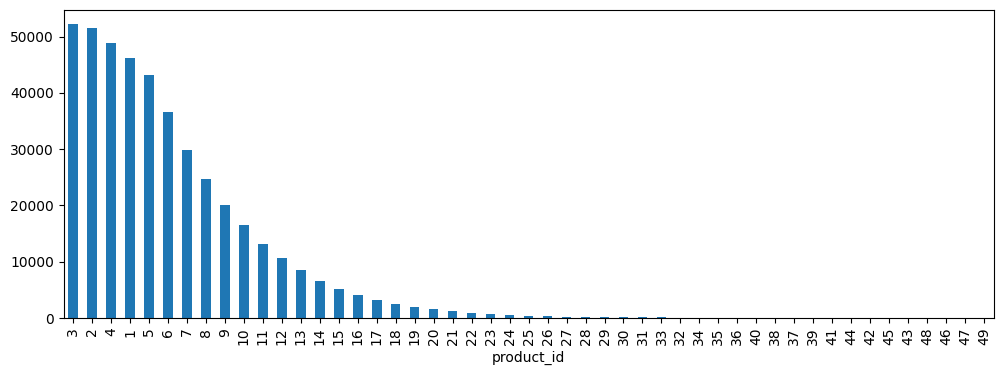

In [ ]:
# O que dá para fazer colocar isso num grafico para visualizar os numeros.

# vamos criar uma variável para colocar no histograma

hist_aux = num_itens_pedido.value_counts()
plt.figure(figsize=(12,4))
hist_aux[hist_aux.index < 50].plot.bar()

OR

In [ ]:
# Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
df_qtd_itens = order_products_df.groupby('order_id')['product_id'].count()#.value_counts()
df_qtd_itens
#vamos calcular a mediana que indica quantos itens uma pessoa pede em 1 pedido
df_qtd_itens.median()


5.0

<Axes: >

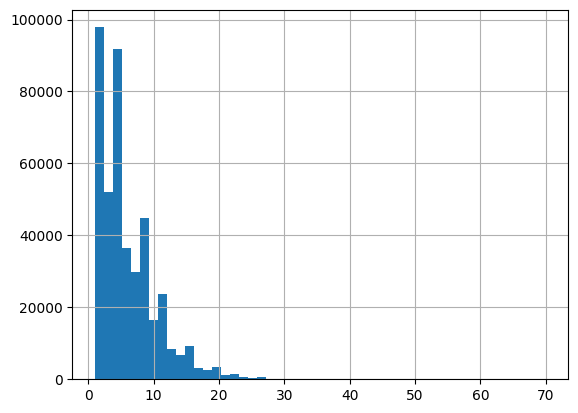

In [ ]:
df_qtd_itens.hist(bins=50)

<Axes: xlabel='product_id'>

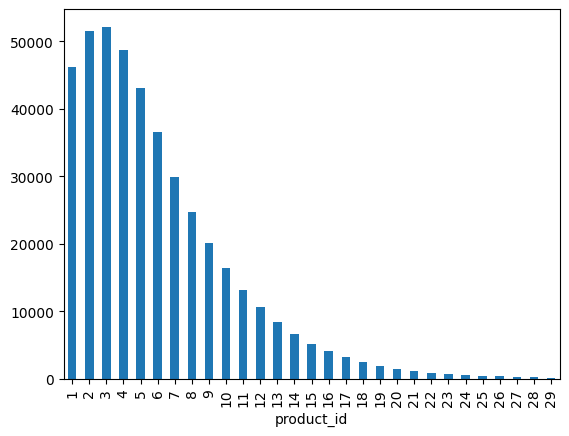

In [ ]:
df_qtd_itens[df_qtd_itens<30].value_counts().sort_index().plot.bar()
# Por esse grafico podemos ver que são pedido entre 5 e 6 produtos

<Axes: ylabel='Frequency'>

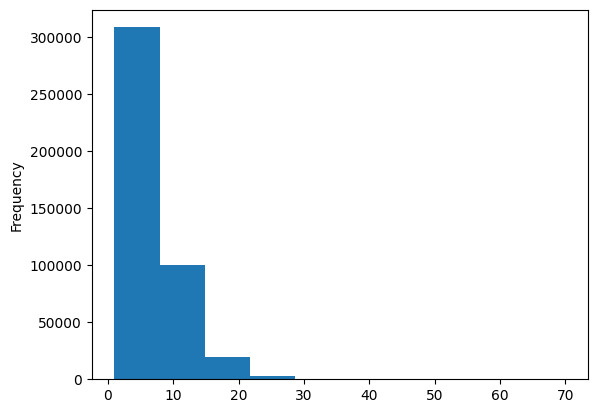

In [ ]:
df_qtd_itens.plot.hist( )

In [ ]:
# Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

df_aux = order_products_df[order_products_df['reordered'] == 1].groupby('product_id')['order_id'].count().sort_values(ascending=False).head(20).reset_index()
df_aux.rename(columns={'order_id': 'contagem'}, inplace=True)

df_final = pd.merge(df_aux, products_df[['product_id', 'product_name']], on='product_id')
# Podemos mudar a ordem de visualizar
df_final[['product_id', 'product_name', 'contagem']]

,product_id,product_name,contagem
0,24852,banana,31858
1,13176,bag of organic bananas,25361
2,21137,organic strawberries,16357
3,21903,organic baby spinach,14968
4,47209,organic hass avocado,13457
5,47766,organic avocado,10744
6,27845,organic whole milk,9129
7,47626,large lemon,8611
8,27966,organic raspberries,8422
9,16797,strawberries,7906


In [ ]:
# Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.

# Calcular a contagem total de pedidos para cada produto
total_orders_per_product = order_products_df.groupby('product_id')['order_id'].nunique()

# Calcular a contagem de pedidos repetidos para cada produto
repeated_orders_per_product = order_products_df[order_products_df['reordered'] == 1].groupby('product_id')['order_id'].nunique()

# Calcular a proporção de pedidos repetidos para cada produto
repeated_orders_ratio = repeated_orders_per_product / total_orders_per_product

# Criar uma nova tabela com colunas de ID e nome do produto
product_repeated_orders_info = pd.DataFrame({
    'product_id': repeated_orders_ratio.index,
    'proporcao_repetidos': repeated_orders_ratio.values
})

# Mesclar a tabela com as informações do produto
product_repeated_orders_info = product_repeated_orders_info.merge(products_df[['product_id', 'product_name']], on='product_id')
result_sem_nan = product_repeated_orders_info.dropna(subset=['proporcao_repetidos'])
product_repeated_orders_info = result_sem_nan

# Exibir a tabela resultante
print(product_repeated_orders_info)


       product_id  proporcao_repetidos  \
0               1             0.598765   
2               3             0.777778   
3               4             0.444444   
4               8             0.250000   
5               9             0.769231   
...           ...                  ...   
42274       49690             0.800000   
42275       49691             0.430556   
42276       49692             0.416667   
42277       49693             0.440000   
42278       49694             0.333333   

                                            product_name  
0                             chocolate sandwich cookies  
2                   robust golden unsweetened oolong tea  
3      smart ones classic favorites mini rigatoni wit...  
4                      cut russet potatoes steam n' mash  
5                      light strawberry blueberry yogurt  
...                                                  ...  
42274                      high performance energy drink  
42275                  

Que os itens mais frequentementes comprados são organicos.  Desta forma terão necessidades de maior rotatividde, terá que ter muita atenção na reposição.

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [ ]:
# Em pedidos repedidos
repeated_orders = order_products_df[order_products_df['reordered'] == 1]  # aqui conseguimos pegar os produtos repetidos, ou comprado mais de 1 vez
repeated_orders

,order_id,product_id,add_to_cart_order,reordered
1,567889,1560,1,1.0
2,2261212,26683,1,1.0
3,491251,8670,35,1.0
4,2571142,1940,5,1.0
5,2456893,21616,4,1.0
...,...,...,...,...
2593856,1382065,8518,9,1.0
2593857,1285979,45007,13,1.0
2593858,908080,13176,1,1.0
2593862,991345,27966,2,1.0


In [ ]:
df_merge = order_products_df[order_products_df['reordered'] == 1].merge(products_df, on='product_id')
df_merge

df_merge.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False).head(20).reset_index()


,product_id,product_name,order_id
0,24852,banana,31858
1,13176,bag of organic bananas,25361
2,21137,organic strawberries,16357
3,21903,organic baby spinach,14968
4,47209,organic hass avocado,13457
5,47766,organic avocado,10744
6,27845,organic whole milk,9129
7,47626,large lemon,8611
8,27966,organic raspberries,8422
9,16797,strawberries,7906


OR


In [ ]:
# Contar a frequência de cada produto
top_repeated_items = repeated_orders['product_id'].value_counts().head(20)
top_repeated_items

,count
product_id,
24852,31858
13176,25361
21137,16357
21903,14968
47209,13457
47766,10744
27845,9129
47626,8611
27966,8422


In [ ]:
# Criar um DataFrame com os IDs e nomes dos produtos mais frequentes
top_repeated_items_info = pd.DataFrame({
    'product_id': top_repeated_items.index,
    'frequency': top_repeated_items.values
})


In [ ]:
# Mesclar as informações do produto
top_repeated_items_info = top_repeated_items_info.merge(products_df[['product_id', 'product_name']], on='product_id')

# Exibir o resultado
print(top_repeated_items_info)

    product_id  frequency              product_name
0        24852      31858                    banana
1        13176      25361    bag of organic bananas
2        21137      16357      organic strawberries
3        21903      14968      organic baby spinach
4        47209      13457      organic hass avocado
5        47766      10744           organic avocado
6        27845       9129        organic whole milk
7        47626       8611               large lemon
8        27966       8422       organic raspberries
9        16797       7906              strawberries
10       26209       7570                     limes
11       22935       6373      organic yellow onion
12       24964       5920            organic garlic
13       45007       5762          organic zucchini
14       49683       5492            cucumber kirby
15       28204       5128        organic fuji apple
16        8277       5087  apple honeycrisp organic
17       39275       5044       organic blueberries
18       492

Esses são os 20 principais itens incluídos mais frequentemente em pedidos repetidos, com seus IDs, nomes e frequência de ocorrência. Podemos ver que a maioria dos itens são produtos orgânicos, como bananas, morangos, espinafre, abacate, e assim por diante. Isso sugere uma preferência geral dos clientes por produtos orgânicos, refletindo possivelmente uma tendência de hábitos de compra mais saudáveis.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [ ]:
# Calcular o número total de pedidos para cada produto
total_orders_per_product = order_products_df.groupby('product_id')['order_id'].nunique()

# Calcular o número de pedidos repetidos para cada produto
repeated_orders_per_product = order_products_df[order_products_df['reordered'] == 1].groupby('product_id')['order_id'].nunique()

In [ ]:
# Calcular a parcela de todos os pedidos de cada produto que são repetidos
repeated_orders_ratio = repeated_orders_per_product / total_orders_per_product

In [ ]:
# Calcular a parcela de pedidos repetidos para cada produto
repeated_orders_ratio = repeated_orders_per_product / total_orders_per_product

# Criar um DataFrame com as informações
product_repeated_orders_info = pd.DataFrame({
    'product_id': repeated_orders_ratio.index,
    'repeated_order_ratio': repeated_orders_ratio.values
})


In [ ]:
# Mesclar com as informações dos produtos
product_repeated_orders_info = product_repeated_orders_info.merge(products_df[['product_id', 'product_name']], on='product_id')

# Mesclar com as informações dos produtos
product_repeated_orders_info = product_repeated_orders_info.merge(products_df[['product_id', 'product_name']], on='product_id')


# Exibir o resultado
print(product_repeated_orders_info)


       product_id  repeated_order_ratio  \
0               1              0.598765   
1               2                   NaN   
2               3              0.777778   
3               4              0.444444   
4               8              0.250000   
...           ...                   ...   
42274       49690              0.800000   
42275       49691              0.430556   
42276       49692              0.416667   
42277       49693              0.440000   
42278       49694              0.333333   

                                          product_name_x  \
0                             chocolate sandwich cookies   
1                                       all-seasons salt   
2                   robust golden unsweetened oolong tea   
3      smart ones classic favorites mini rigatoni wit...   
4                      cut russet potatoes steam n' mash   
...                                                  ...   
42274                      high performance energy drink   
422

Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [ ]:

# Merge entre orders_df e order_products_df para obter informações completas sobre os pedidos
merged_df = pd.merge(instacart_orders_df, order_products_df, on='order_id', how='inner')

# Calcular a contagem total de pedidos para cada cliente
total_orders_per_user = merged_df.groupby('user_id')['order_id'].nunique()

# Calcular a contagem de pedidos repetidos para cada cliente
repeated_orders_per_user = merged_df[merged_df['reordered'] == 1].groupby('user_id')['order_id'].nunique()

# Calcular a proporção de pedidos repetidos para cada cliente
repeated_orders_ratio_per_user = repeated_orders_per_user / total_orders_per_user

repeated_orders_ratio_per_user = repeated_orders_ratio_per_user.dropna()

# Criar um DataFrame com as proporções de pedidos repetidos por cliente
repeated_orders_info_per_user = pd.DataFrame({
    'user_id': repeated_orders_ratio_per_user.index,
    'repeated_order_ratio': repeated_orders_ratio_per_user.values
})

order_products_df = order_products_df.dropna()

# Exibir o DataFrame resultante
print(repeated_orders_info_per_user)


        user_id  repeated_order_ratio
0             2              0.500000
1             5              1.000000
2             7              1.000000
3            11              1.000000
4            12              1.000000
...         ...                   ...
125446   206203              1.000000
125447   206206              0.666667
125448   206207              0.800000
125449   206208              1.000000
125450   206209              0.500000

[125451 rows x 2 columns]


A maioria dos clientes teve todos os seus pedidos repetidos, indicando uma alta fidelidade e padrões consistentes de compra ao longo do tempo.

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [ ]:
# Calcular a média da ordem de adição ao carrinho para cada produto
mean_add_to_cart_order = order_products_df.groupby('product_id')['add_to_cart_order'].mean()


In [ ]:
# Ordenar em ordem decrescente e obter os 20 principais itens
top_items_first_in_cart = mean_add_to_cart_order.sort_values(ascending=True).head(20)

In [ ]:
# Exibir os 20 principais itens
print(top_items_first_in_cart)

product_id
23660    1.0
31405    1.0
15432    1.0
26622    1.0
15458    1.0
31368    1.0
31360    1.0
15481    1.0
41945    1.0
39855    1.0
47210    1.0
5418     1.0
26682    1.0
45011    1.0
31298    1.0
45022    1.0
39894    1.0
39903    1.0
15554    1.0
15565    1.0
Name: add_to_cart_order, dtype: float64


Esses resultados indicam que os produtos listados têm uma alta probabilidade de serem os primeiros itens adicionados ao carrinho de compras pelos clientes. Isso sugere que esses produtos são muito populares ou essenciais para os compradores, o que os leva a serem priorizados como o primeiro item a ser adicionado ao carrinho.

# Conclusão geral do projeto:


Os pedidos têm picos de atividade entre 9h e 16h, com menor atividade durante a madrugada. Segunda-feira e domingo
são os dias com mais pedidos, indicando preparação para a semana e reabastecimento. Há um pico na quinta-feira,
possivelmente relacionado ao planejamento para o final de semana, enquanto terça e quarta-feira têm menor atividade.
A maioria dos pedidos é feita no mesmo dia do pedido anterior, com um pico no sétimo dia desde o último pedido.
A maioria dos clientes fez apenas um ou dois pedidos, e os padrões de pedidos não diferem significativamente entre
quartas-feiras e sábados. Os itens mais frequentemente comprados são orgânicos, refletindo uma preferência por
hábitos de compra saudáveis. A alta fidelidade dos clientes é evidente, com a maioria tendo todos os seus pedidos repetidos.





















<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto.

Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Bons gráficos    


<span class="text-danger">Porém, há espaço para melhorias conforme os itens apontados anteriormente. Destaco os  pontos a seguir: </span>
 * <span class="text-danger"> Há alguns pequenos erros em vermelho. Deixei dicas. </span>


Portanto, sugiro que você corrija os pontos indicados.

Se você tiver alguma dúvida sobre de algo que você não tenha entendido, sinta-se à vontade para perguntar ao tutor ou deixar um comentário em **azul** para que, na próxima iteração, eu possa responder.

Conte conosco. Lembre-se de que você pode tirar dúvidas com revisores usando os comentários ou buscar ajuda de um tutor.
Bom trabalho.
</div>

<div class="alert alert-block alert-success">
<b> Comentário Geral do revisor: </b> <a class="tocSkip"></a>

Parabéns pelo esforço em corrigir os pontos indicados. Agora podemos prosseguir para a próxima seção. Porém, veja o comentário que eu deixei pois para garantir que todos estão associados com 21 precisamos verificar se há algum diferente de 21, então buscamos != 21.
</div>